# FBI Uniform Crime Reporting Analysis | 2012

*Author: Sanika Chaudhari, Sailee Choudhari, Sushmitha Sudharsan (Team: Data Miners)*


## Table of Contents

1. Establishing connection with kaggle
2. Importing libraries
3. Importing dataset    
4. Basic Text Data Pre-processing & Cleaning Text Data
5. Preparing Data for Exploratory Data Analysis (EDA)
6. Exploratory Data Analysis
7. Feature Selection
8. Data modelling
9. Conclusion
10. Reference


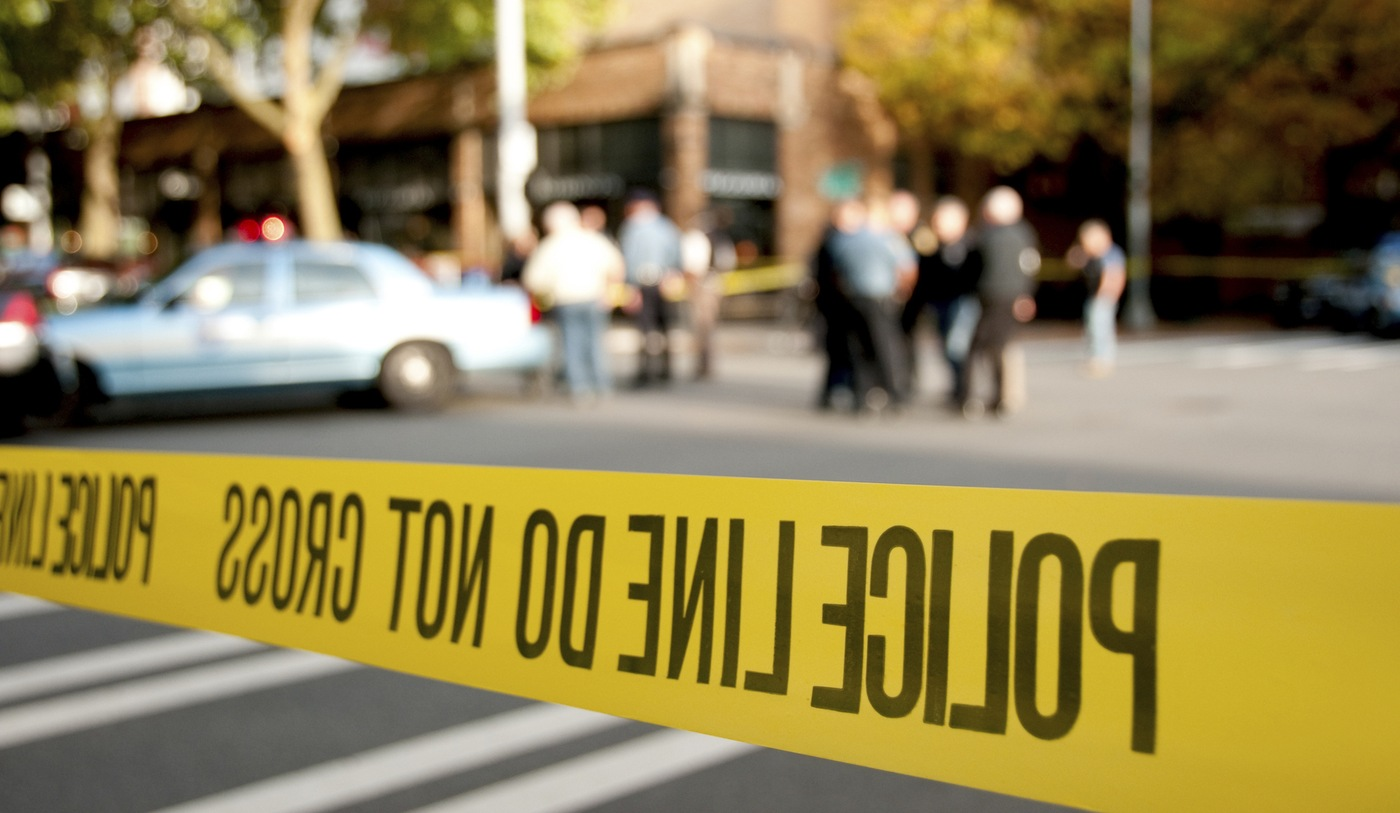

[Image Source](https://www.fbi.gov/news/stories/latest-crime-statistics-released)

># **1- Importing dataset ditectly from kaggle**
---

In [6]:
#using the dataset provided

># **2- Importing libraries**
---

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from sklearn.model_selection import cross_val_score

># **3- Importing dataset**
---

In [8]:
df = pd.read_excel("/content/drive/MyDrive/U.S._Offense_Type_by_Agency_2012.xlsx", skiprows=3, header=[0,1])

> # **4- Basic Text Data Pre-processing**
---

In [9]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [10]:
df.columns = [col[0] if "Unnamed" in str(col[1]) else f"{col[0]} - {col[1]}"
              for col in df.columns]
df.columns = [name.replace('\n', ' ').strip() for name in df.columns]

In [11]:
pattern = r"Population figures are|This agency reported 24 Murder|Student enrollment figures were not available|The FBI UCR Program determined this agency"
df = df[~df['State'].str.contains(pattern, na=False)]

> # **5- Preparing Data for Exploratory Data Analysis (EDA)**

In [12]:
df['State'] = df['State'].ffill()
df['Agency Type'] = df['Agency Type'].ffill()

<ipython-input-12-7d960bbf842a>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['State'] = df['State'].ffill()
<ipython-input-12-7d960bbf842a>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Agency Type'] = df['Agency Type'].ffill()


In [13]:
offense_cols = [col for col in df.columns if col not in ['State','Agency Type','Agency Name','Population']]
df[offense_cols] = df[offense_cols].fillna(0)

<ipython-input-13-6dd467bafc3d>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[offense_cols] = df[offense_cols].fillna(0)


In [14]:
df['State'].unique()

array(['ALABAMA', 'ARIZONA', 'ARKANSAS', 'COLORADO', 'CONNECTICUT',
       'DELAWARE', 'DISTRICT OF COLUMBIA', 'IDAHO', 'ILLINOIS', 'IOWA',
       'KANSAS', 'KENTUCKY', 'MAINE', 'MASSACHUSETTS', 'MICHIGAN',
       'MISSISSIPPI', 'MISSOURI', 'MONTANA', 'NEBRASKA', 'NEW HAMPSHIRE',
       'NORTH DAKOTA', 'OHIO', 'OKLAHOMA', 'OREGON', 'RHODE ISLAND',
       'SOUTH CAROLINA', 'SOUTH DAKOTA', 'TENNESSEE', 'TEXAS', 'UTAH',
       'VERMONT', 'VIRGINIA', 'WASHINGTON', 'WEST VIRGINIA', 'WISCONSIN'],
      dtype=object)

In [15]:
df.isnull().sum() #null values are zero because it is handled in the above steps

,0
State,0
Agency Type,0
Agency Name,0
Population1,0
Crimes Against Persons - Assault Offenses,0
Crimes Against Persons - Aggravated Assault,0
Crimes Against Persons - Simple Assault,0
Crimes Against Persons - Intimidation,0
Crimes Against Persons - Homicide Offenses,0
Crimes Against Persons - Murder and Nonnegligent Manslaughter,0


In [16]:
df.head()

,State,Agency Type,Agency Name,Population1,Crimes Against Persons - Assault Offenses,Crimes Against Persons - Aggravated Assault,Crimes Against Persons - Simple Assault,Crimes Against Persons - Intimidation,Crimes Against Persons - Homicide Offenses,Crimes Against Persons - Murder and Nonnegligent Manslaughter,...,Crimes Against Society - Gambling Offenses,Crimes Against Society - Betting/ Wagering,Crimes Against Society - Operating/ Promoting/ Assisting Gambling,Crimes Against Society - Gambling Equipment Violations,Crimes Against Society - Sports Tampering,Crimes Against Society - Porno- graphy/ Obscene Material,Crimes Against Society - Prost- itution Offenses,Crimes Against Society - Prost- itution,Crimes Against Society - Assisting or Pro- moting Prost- itution,Crimes Against Society - Weapon Law Violations
0,ALABAMA,Cities,Hoover,82332.0,870.0,25.0,594.0,251.0,2.0,2.0,...,0.0,0.0,0.0,0.0,0.0,4.0,0.0,0.0,0.0,26.0
1,ARIZONA,Cities,Apache Junction,36986.0,559.0,96.0,381.0,82.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,25.0
2,ARIZONA,Cities,Gilbert,214264.0,1242.0,123.0,892.0,227.0,5.0,5.0,...,0.0,0.0,0.0,0.0,0.0,16.0,0.0,0.0,0.0,75.0
3,ARIZONA,Metropolitan Counties,Yuma2,0.0,555.0,94.0,376.0,85.0,26.0,26.0,...,0.0,0.0,0.0,0.0,0.0,5.0,2.0,1.0,1.0,40.0
4,ARKANSAS,Cities,Alma,5439.0,197.0,11.0,108.0,78.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,4.0


> # **6- Exploratory data analysis**

## Que - A

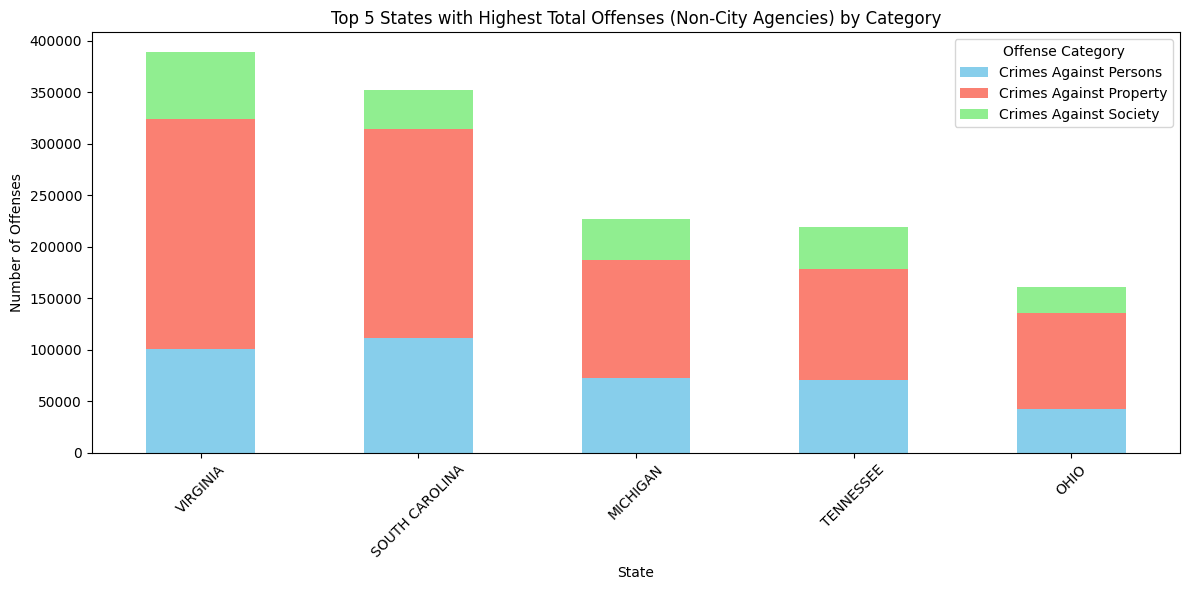

In [17]:
import pandas as pd
import matplotlib.pyplot as plt

# ----------------------------
# Step 1: Filter Data to Exclude Cities
# ----------------------------
non_city_data = df[df['Agency Type'] != 'Cities']

# ----------------------------
# Step 2: Define the Major Offense Categories
# ----------------------------
# We assume the column names follow the format "Crimes Against <Category> - <Sub-type>"
persons_cols = [col for col in df.columns if col.startswith("Crimes Against Persons")]
property_cols = [col for col in df.columns if col.startswith("Crimes Against Property")]
society_cols = [col for col in df.columns if col.startswith("Crimes Against Society")]

# ----------------------------
# Step 3: Group Data by State and Sum Offenses for Each Category
# ----------------------------
# First, group the non-city data by state and sum numeric columns
grouped = non_city_data.groupby('State').sum(numeric_only=True)

# Create a new DataFrame that aggregates each major category
category_totals = pd.DataFrame(index=grouped.index)
category_totals['Crimes Against Persons'] = grouped[persons_cols].sum(axis=1)
category_totals['Crimes Against Property'] = grouped[property_cols].sum(axis=1)
category_totals['Crimes Against Society'] = grouped[society_cols].sum(axis=1)

# Also compute a total offense count per state
category_totals['Total_Offenses'] = category_totals.sum(axis=1)

# ----------------------------
# Step 4: Select the Top 5 States by Total Offenses
# ----------------------------
top_states = category_totals.nlargest(5, 'Total_Offenses')

# ----------------------------
# Step 5: Plot a Stacked Bar Chart
# ----------------------------
# Drop the total column for the stacked bar chart
top_states.drop(columns='Total_Offenses').plot(
    kind='bar',
    stacked=True,
    figsize=(12, 6),
    color=['skyblue', 'salmon', 'lightgreen']
)
plt.title('Top 5 States with Highest Total Offenses (Non-City Agencies) by Category')
plt.ylabel('Number of Offenses')
plt.xlabel('State')
plt.xticks(rotation=45)
plt.legend(title='Offense Category')
plt.tight_layout()
plt.show()

South Carolina and Virginia have notably high counts across all sub-types, indicating a broader distribution of assault cases.

Tennessee and Michigan show a higher proportion of simple assaults compared to other sub-types.

In [ ]:
#question 2

# First we filter for University and College Agencies
df_uni_col = df[df['Agency Type'].str.contains('university|college', case=False, na=False)]

# TASK B:
# Which category of crimes were most registered in universities/colleges?

# We try to identify offense columns by category
persons_cols = [col for col in df_uni_col.columns if col.startswith("Crimes Against Persons")]
property_cols = [col for col in df_uni_col.columns if col.startswith("Crimes Against Property")]
society_cols = [col for col in df_uni_col.columns if col.startswith("Crimes Against Society")]

# Summing the totals for each broad category
total_persons = df_uni_col[persons_cols].sum().sum()
total_property = df_uni_col[property_cols].sum().sum()
total_society = df_uni_col[society_cols].sum().sum()

crime_totals = {
    "Crimes Against Persons": total_persons,
    "Crimes Against Property": total_property,
    "Crimes Against Society": total_society
}

# Determine the most registered crime category
most_common_category = max(crime_totals, key=crime_totals.get)

print("Task B: Most registered crime category in Universities/Colleges:")
print(most_common_category)
print(crime_totals)

Task B: Most registered crime category in Universities/Colleges:
Crimes Against Property
{'Crimes Against Persons': np.float64(9530.0), 'Crimes Against Property': np.float64(55432.0), 'Crimes Against Society': np.float64(18910.0)}


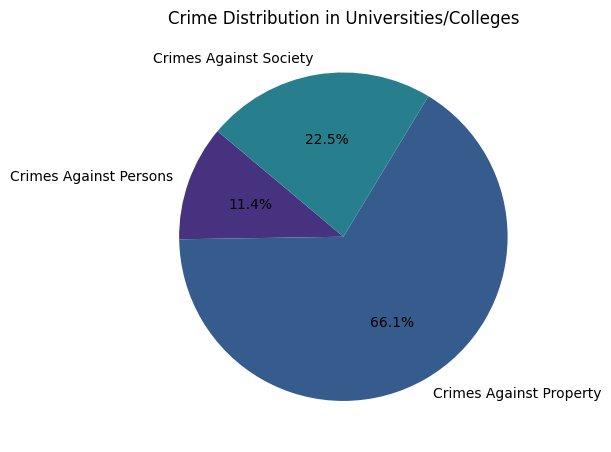

In [ ]:
# Pie Chart
plt.figure(figsize=(6, 6))
plt.pie(crime_totals.values(), labels=crime_totals.keys(), autopct='%1.1f%%', startangle=140, colors=sns.color_palette('viridis'))
plt.title('Crime Distribution in Universities/Colleges')
plt.tight_layout()
plt.show()


Based on the pie chart, Crimes Against Property were the most registered category in universities/colleges, accounting for a significant 66.1% of the reported incidents. This indicates that offenses related to property, such as theft or vandalism, are the most prevalent type of crime on these campuses.


Task C: Offense Comparison:
Michigan State University Total Offenses: 1921.0
Other Universities/Colleges Total Offenses: 81951.0


<ipython-input-17-98263e145b55>:23: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=['MSU', 'Other Universities/Colleges'], y=[msu_total_offenses, others_total_offenses], palette="pastel")


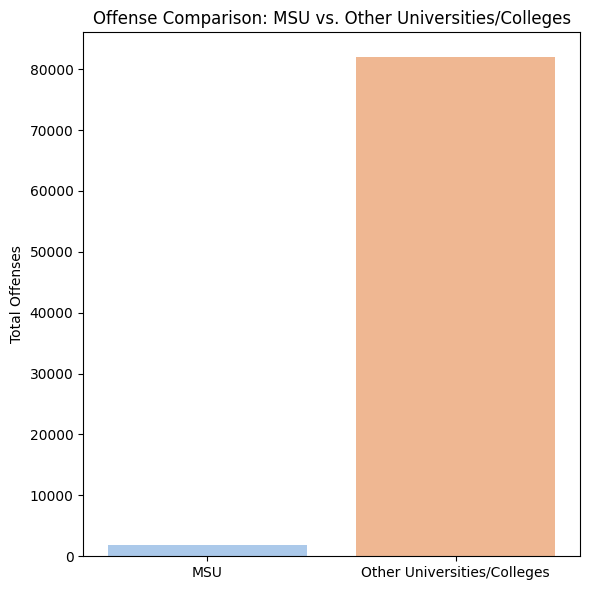

In [ ]:
# TASK C:
# Compare offenses at Michigan State University with offenses at all other universities/colleges.


# First we tried to identify all offense columns (in our dataset Crimes Against as per our column names)
offense_cols = [col for col in df.columns if col.startswith("Crimes Against")]

# From the filtered data we filter for Michigan State University (MSU) and other universities/colleges
msu = df_uni_col[df_uni_col['Agency Name'].str.contains('Michigan State University', case=False, na=False)]
others = df_uni_col[~df_uni_col['Agency Name'].str.contains('Michigan State University', case=False, na=False)]

# Calculation of overall offense totals
msu_total_offenses = msu[offense_cols].sum().sum()
others_total_offenses = others[offense_cols].sum().sum()

print("\nTask C: Offense Comparison:")
print("Michigan State University Total Offenses:", msu_total_offenses)
print("Other Universities/Colleges Total Offenses:", others_total_offenses)

# Optional: Visualize the comparison
plt.figure(figsize=(6,6))
sns.barplot(x=['MSU', 'Other Universities/Colleges'], y=[msu_total_offenses, others_total_offenses], palette="pastel")
plt.title("Offense Comparison: MSU vs. Other Universities/Colleges")
plt.ylabel("Total Offenses")
plt.tight_layout()
plt.show()

Based on the bar chart, the total number of offenses at MSU (Michigan State University) is significantly lower than the total number of offenses at Other Universities/Colleges. The bar representing "Other Universities/Colleges" is substantially taller than the bar for "MSU", indicating a much higher volume of reported offenses across all other institutions combined compared to Michigan State University.

In [ ]:
#Task D

# Filter for state police agencies
df_state_police = df[df['Agency Type'].str.contains('state police', case=False, na=False)].copy()

# Define the digital offense columns
digital_offense_cols = [
    'Crimes Against Property - Credit Card/ Automated Teller Machine Fraud',
    'Crimes Against Property - Wire Fraud'
]

# Calculate the digital offenses for each row (for state police agencies)
df_state_police['Digital_Offenses'] = df_state_police[digital_offense_cols].sum(axis=1)

# Group by province (assuming the 'State' column represents provinces) and sum digital offenses
state_digital = df_state_police.groupby('State')['Digital_Offenses'].sum()

# Sort the provinces by total digital offenses in ascending order and take the top 10
lowest_states = state_digital.sort_values(ascending=True)

print("Provinces with the lowest number of digital offenses (State Police Agencies):")
print(lowest_states)

Provinces with the lowest number of digital offenses (State Police Agencies):
State
COLORADO            0.0
OHIO                0.0
TENNESSEE           0.0
SOUTH CAROLINA      0.0
WASHINGTON          0.0
IDAHO               1.0
UTAH                2.0
VIRGINIA            3.0
KANSAS              5.0
VERMONT            34.0
RHODE ISLAND       64.0
WEST VIRGINIA     135.0
CONNECTICUT       174.0
KENTUCKY          211.0
MICHIGAN          474.0
DELAWARE          517.0
Name: Digital_Offenses, dtype: float64


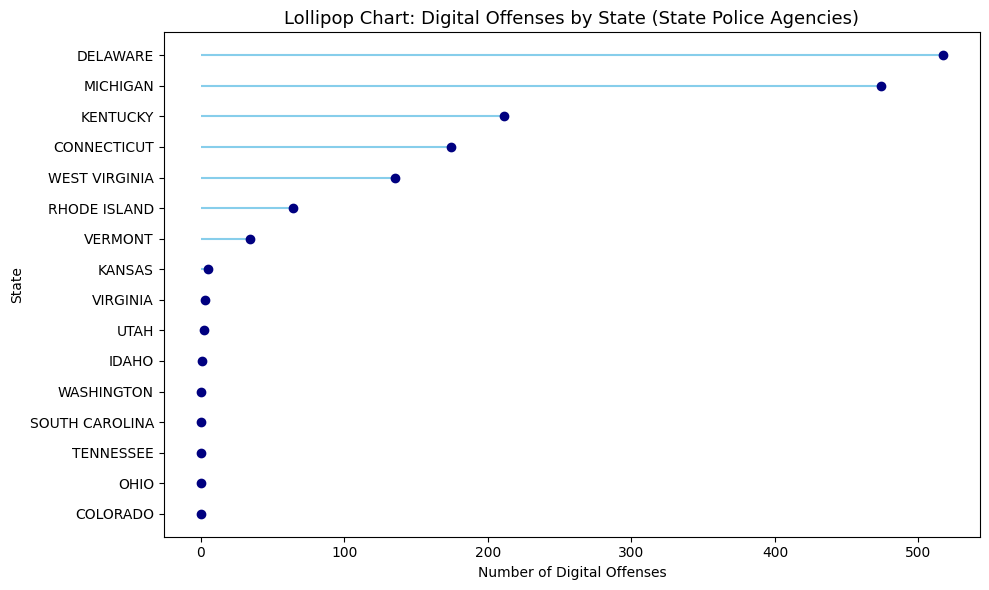

In [ ]:
lowest_states_df = lowest_states.reset_index()
lowest_states_df.columns = ['State', 'Digital_Offenses']

plt.figure(figsize=(10, 6))
plt.hlines(y=lowest_states_df['State'], xmin=0, xmax=lowest_states_df['Digital_Offenses'], color='skyblue')
plt.plot(lowest_states_df['Digital_Offenses'], lowest_states_df['State'], "o", color='navy')
plt.title('Lollipop Chart: Digital Offenses by State (State Police Agencies)', fontsize=13)
plt.xlabel('Number of Digital Offenses')
plt.ylabel('State')
plt.tight_layout()
plt.show()


Based on the chart, the states with the lowest number of registered digital offenses are:

COLORADO: This state shows the lowest number of digital offenses among those listed.

OHIO: Following closely, Ohio also has a very low number of registered digital offenses.

TENNESSEE: Tennessee's state agencies have also registered a minimal number of digital offenses according to the chart.

In [ ]:
#Task E

# Identify the columns
offense_cols = [col for col in df.columns if col.startswith("Crimes Against")]

# Calculating total offenses for each agency
df['Total_Offenses'] = df[offense_cols].sum(axis=1)

# Calculating offenses per million people using the 'Population1' column
df['Offenses_per_Million'] = df['Total_Offenses'] / df['Population1'] * 1_000_000

# For each agency type, finding the agency with the highest offenses per million
top_agencies = df.loc[df.groupby('Agency Type')['Offenses_per_Million'].idxmax()]

print("Agency Types and their respective agency names with the highest offenses per million people:")
print(top_agencies[['Agency Type', 'Agency Name']])

Agency Types and their respective agency names with the highest offenses per million people:
                    Agency Type                       Agency Name
288                      Cities                          Lakeside
3         Metropolitan Counties                             Yuma2
172    Nonmetropolitan Counties                          Arkansas
214              Other Agencies                     Camp Robinson
1073    Other Agencies - Tribal                 Potawatomi Tribal
408       State Police Agencies             Colorado State Patrol
344   Universities and Colleges  Auraria Higher Education Center3


In [19]:
import pandas as pd
import plotly.express as px


# Step 1: Group Data by State and Sum Offense Columns

# Identify offense columns (all columns starting with "Crimes Against")
offense_cols = [col for col in df.columns if col.startswith("Crimes Against")]

# Group the data by 'State' and sum the offense columns
state_offenses = df.groupby("State")[offense_cols].sum()


# Step 2: Determine the Top Offense and Its Count per State

# For each state, find the offense column (category) with the highest total
state_top_offense = state_offenses.idxmax(axis=1)
# Also, get the maximum count for each state (i.e., the count of that top offense)
top_offense_count = state_offenses.max(axis=1)

# Convert these Series into DataFrames and merge them
state_top_offense_df = state_top_offense.reset_index()
state_top_offense_df.columns = ["State", "Top_Offense"]

top_offense_count_df = top_offense_count.reset_index(name='Top_Offense_Count')
state_top_offense_df = state_top_offense_df.merge(top_offense_count_df, on="State")


# Step 3: Standardize State Names and Map to Abbreviations

# Remove extra spaces and convert to title case (e.g., "california" -> "California")
state_top_offense_df['State'] = state_top_offense_df['State'].str.strip().str.title()

# Dictionary mapping full state names to their two-letter abbreviations
us_state_abbrev = {
    'Alabama': 'AL', 'Alaska': 'AK', 'Arizona': 'AZ', 'Arkansas': 'AR',
    'California': 'CA', 'Colorado': 'CO', 'Connecticut': 'CT', 'Delaware': 'DE',
    'Florida': 'FL', 'Georgia': 'GA', 'Hawaii': 'HI', 'Idaho': 'ID', 'Illinois': 'IL',
    'Indiana': 'IN', 'Iowa': 'IA', 'Kansas': 'KS', 'Kentucky': 'KY', 'Louisiana': 'LA',
    'Maine': 'ME', 'Maryland': 'MD', 'Massachusetts': 'MA', 'Michigan': 'MI',
    'Minnesota': 'MN', 'Mississippi': 'MS', 'Missouri': 'MO', 'Montana': 'MT',
    'Nebraska': 'NE', 'Nevada': 'NV', 'New Hampshire': 'NH', 'New Jersey': 'NJ',
    'New Mexico': 'NM', 'New York': 'NY', 'North Carolina': 'NC', 'North Dakota': 'ND',
    'Ohio': 'OH', 'Oklahoma': 'OK', 'Oregon': 'OR', 'Pennsylvania': 'PA',
    'Rhode Island': 'RI', 'South Carolina': 'SC', 'South Dakota': 'SD', 'Tennessee': 'TN',
    'Texas': 'TX', 'Utah': 'UT', 'Vermont': 'VT', 'Virginia': 'VA', 'Washington': 'WA',
    'West Virginia': 'WV', 'Wisconsin': 'WI', 'Wyoming': 'WY'
}

# Create a new column for state codes using the mapping dictionary
state_top_offense_df['State Code'] = state_top_offense_df['State'].map(us_state_abbrev)

# Step 4: Create a Choropleth Map Using Plotly Express

fig = px.choropleth(
    state_top_offense_df,
    locations='State Code',         # Column with two-letter state abbreviations
    locationmode="USA-states",        # Tells Plotly that these are U.S. state codes
    color='Top_Offense',              # Colors represent the top offense type
    hover_data=['Top_Offense_Count'], # Display the count on hover
    scope="usa",                      # Limit map to USA
    color_discrete_sequence=px.colors.qualitative.Set3,
    title="Top Offense Type by State (with Count)"
)

# Display the map (opens in browser if needed)
fig.show()

In [ ]:
print("\nTop Offense Type with the Highest Number of Offenses per State:")
for index, row in state_top_offense_df[['State', 'Top_Offense']].iterrows():
    print(f"In {row['State']}, the offense type with the highest number of offenses is: {row['Top_Offense']}")


Top Offense Type with the Highest Number of Offenses per State:
In Alabama, the offense type with the highest number of offenses is: Crimes Against Property - Larceny- Theft Offenses
In Arizona, the offense type with the highest number of offenses is: Crimes Against Property - Larceny- Theft Offenses
In Arkansas, the offense type with the highest number of offenses is: Crimes Against Property - Larceny- Theft Offenses
In Colorado, the offense type with the highest number of offenses is: Crimes Against Property - Larceny- Theft Offenses
In Connecticut, the offense type with the highest number of offenses is: Crimes Against Property - Larceny- Theft Offenses
In Delaware, the offense type with the highest number of offenses is: Crimes Against Property - Larceny- Theft Offenses
In District Of Columbia, the offense type with the highest number of offenses is: Crimes Against Property - Larceny- Theft Offenses
In Idaho, the offense type with the highest number of offenses is: Crimes Against 

In [ ]:
df.to_csv("cleaned_data.csv", index=False) #saving the cleaned dataset

# Que - B


## **7. Feature Selection**



In [ ]:
# Load dataset
df = pd.read_csv('/content/cleaned_data.csv')

# Feature columns
features = [
    'Population1',
    'Crimes Against Society - Drug/ Narcotic Offenses',
    'Crimes Against Society - Drug/ Narcotic Violations',
    'Crimes Against Society - Drug Equipment Violations',
    'Crimes Against Property - Theft From Building',
    'Crimes Against Property - Theft From Coin- operated Machine',
    'Crimes Against Property - Theft From Motor Vehicle',
    'Crimes Against Property - Theft of Motor Vehicle Parts or Accessories'
]

X = df[features].fillna(0)
#Updated Target (Y) columns
target_columns = [
    'Crimes Against Property - Arson',
    'Crimes Against Persons - Assault Offenses',
    'Crimes Against Property - Bribery',
    'Crimes Against Property - Burglary/ Breaking & Entering',
    'Crimes Against Property - Counter- feiting/ Forgery',
    'Crimes Against Property - Destruction/ Damage/ Vandalism',
    'Crimes Against Society - Drug/ Narcotic Offenses',
    'Crimes Against Property - Embezzle- ment',
    'Crimes Against Property - Extortion/ Blackmail',
    'Crimes Against Property - Fraud Offenses',
    'Crimes Against Society - Gambling Offenses',
    'Crimes Against Persons - Homicide Offenses',
    'Crimes Against Persons - Kidnapping/ Abduction',
    'Crimes Against Property - Larceny- Theft Offenses',
    'Crimes Against Property - Motor Vehicle Theft',
    'Crimes Against Society - Porno- graphy/ Obscene Material',
    'Crimes Against Society - Prost- itution Offenses',
    'Crimes Against Property - Robbery',
    'Crimes Against Persons - Sex Offenses, Nonforcible',
    'Crimes Against Property - Stolen Property Offenses',
    'Crimes Against Society - Weapon Law Violations'
]


> # **8. Data Modelling**

> ### **Modelling methods**

In [ ]:
# Calculate the new target variable Y
Y = df[target_columns].fillna(0).sum(axis=1)

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

# Initialize models
models = {
    "LinearRegression": LinearRegression(),
    "Ridge": Ridge(alpha=1.01),
    "Lasso": Lasso(alpha=0.1)
}

> ### **Models evaluation**

In [ ]:
# Train and evaluate
results = {}

for name, model in models.items():
    model.fit(X_train, y_train)
    preds = model.predict(X_test)

    r2 = r2_score(y_test, preds)
    rmse = np.sqrt(mean_squared_error(y_test, preds))
    mae = mean_absolute_error(y_test, preds)
    mse = mean_squared_error(y_test, preds)

    # 5-Fold Cross-validation score
    cv_scores = cross_val_score(model, X_train, y_train, cv=5, scoring='r2')

    results[name] = {
        'R2 Score': r2,
        'RMSE': rmse,
        'MAE': mae,
        'MSE': mse,
        'CV R2 Mean': np.mean(cv_scores),
        'CV R2 Std': np.std(cv_scores)
    }

# Output results
results_df = pd.DataFrame(results).T
print(results_df)


                  R2 Score         RMSE         MAE           MSE  CV R2 Mean  \
LinearRegression  0.912535  1354.672654  335.134428  1.835138e+06    0.926835   
Ridge             0.912535  1354.672634  335.134425  1.835138e+06    0.926835   
Lasso             0.912535  1354.672520  335.134291  1.835138e+06    0.926835   

                  CV R2 Std  
LinearRegression     0.0227  
Ridge                0.0227  
Lasso                0.0227  


> # **9- Conclusion**
---

* The models achieve an R² of approximately 0.9125, meaning they explain over 91% of the variance in total offenses. Also the data has low predictive errors suh as RMSE (approximately 1354.67) and MAE (approximately 335.13). These two metrics are relatively low to the target scale, which is indicating that predictions are accurate.

* We also observe all the models such as OLS, Ridge and Lasso Regression give the same performance. Since Ridge and Lasso do not improve performance over standard Linear Regression, regularization is likely unnecessary for this dataset.

* The cross-validated R² mean is around 0.9268 with a low standard deviation (0.0227) demonstrates robust and consistent model performance.

* Thus it indicates that a Linear Regression model is well suited for this task.








> # **10- Reference**
---